In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
import os
import pandas as pd
import numpy as np

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S20/N'

def analyze_route_lifetime(base_path, label):
    result = []
    for node in h_node:
        file_path = os.path.join(base_path + str(node), 'aodv_routing_log.csv')
        if not os.path.isfile(file_path):
            continue

        df = pd.read_csv(file_path)
        if not {'Time', 'New_LifeTime'}.issubset(df.columns):
            continue

        df = df.sort_values(by='Time')
        df['LifeTimeDuration'] = df['New_LifeTime'] - df['Time']
        df = df[df['LifeTimeDuration'] > 0]

        result.append({
            'Node': node,
            'Label': label,
            'Mean_Lifetime': df['LifeTimeDuration'].mean(),
            'Median_Lifetime': df['LifeTimeDuration'].median(),
            'Count': len(df)
        })
    return pd.DataFrame(result)

df_proposed = analyze_route_lifetime(base_path_proposed, 'Proposed')
df_legacy = analyze_route_lifetime(base_path_legacy, 'Legacy')
df_result = pd.concat([df_proposed, df_legacy], ignore_index=True)
print(df_result)


    Node     Label  Mean_Lifetime  Median_Lifetime   Count
0      0  Proposed       2.341732              2.0  712250
1      4  Proposed       2.085421              2.0  672283
2      6  Proposed       2.167832              2.0  685780
3      9  Proposed       2.549839              2.0  786753
4     10  Proposed       2.135294              2.0  676925
5     11  Proposed       2.156853              2.0  683179
6     17  Proposed       2.298814              2.0  698370
7     22  Proposed       2.155666              2.0  683599
8     29  Proposed       2.402346              2.0  741212
9      0    Legacy       2.249062              2.0  761069
10     4    Legacy       2.057413              2.0  688242
11     6    Legacy       2.110708              2.0  712388
12     9    Legacy       2.155443              2.0  750490
13    10    Legacy       2.110708              2.0  712388
14    11    Legacy       2.096475              2.0  705461
15    17    Legacy       2.259338              2.0  7828

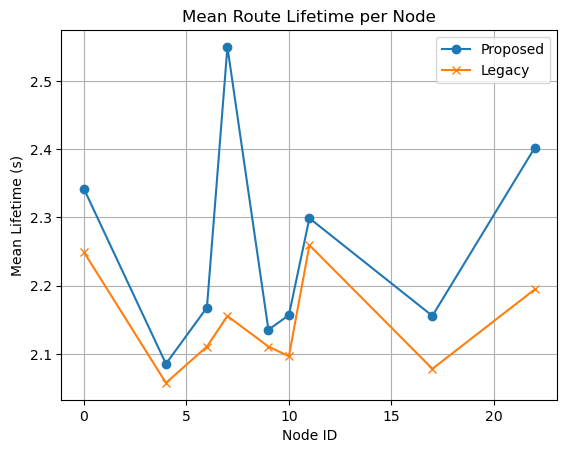

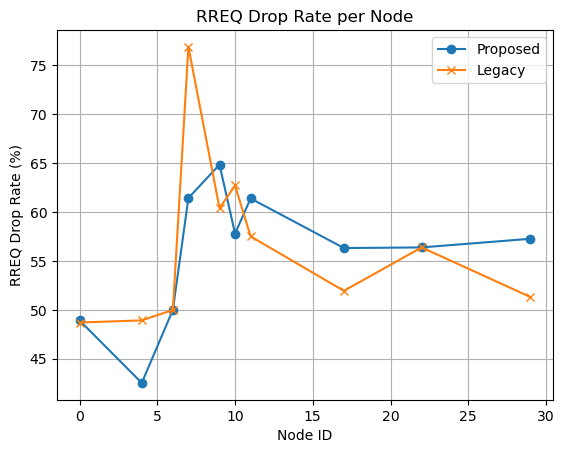

In [36]:
import matplotlib.pyplot as plt

# 데이터 수동 입력
nodes = [0, 4, 6, 7, 9, 10, 11, 17, 22, 29]

# Mean Lifetime
mean_lifetime_proposed = [2.341732, 2.085421, 2.167832, 2.549839, 2.135294, 2.156853, 2.298814, 2.155666, 2.402346]
mean_lifetime_legacy = [2.249062, 2.057413, 2.110708, 2.155443, 2.110708, 2.096475, 2.259338, 2.078080, 2.194575]

# RREQ Drop율 (%)
rreq_drop_proposed = {
    0: 48.91372226787182, 4: 42.53095008740947, 6: 49.98873366381253,
    7: 61.42760983967691, 9: 64.8441640527161, 10: 57.788399883415906,
    11: 61.38499727181206, 17: 56.31501135223612, 22: 56.378657351988856, 29: 57.26344236978801
}
rreq_drop_legacy = {
    0: 48.704957779449884, 4: 48.922335210468745, 6: 49.98873366381253,
    7: 76.86984295980835, 9: 60.38638448188268, 10: 62.708836818325096,
    11: 57.50750597933947, 17: 51.941840443849244, 22: 56.378657351988856, 29: 51.31085654777402
}

# 공통 노드만 정리
common_nodes = list(set(rreq_drop_proposed.keys()) & set(rreq_drop_legacy.keys()))
common_nodes.sort()

# 그래프 1: Mean Route Lifetime
plt.figure()
plt.plot(nodes[:len(mean_lifetime_proposed)], mean_lifetime_proposed, marker='o', label='Proposed')
plt.plot(nodes[:len(mean_lifetime_legacy)], mean_lifetime_legacy, marker='x', label='Legacy')
plt.title('Mean Route Lifetime per Node')
plt.xlabel('Node ID')
plt.ylabel('Mean Lifetime (s)')
plt.grid(True)
plt.legend()

# 그래프 2: RREQ Drop율
plt.figure()
plt.plot(common_nodes, [rreq_drop_proposed[n] for n in common_nodes], marker='o', label='Proposed')
plt.plot(common_nodes, [rreq_drop_legacy[n] for n in common_nodes], marker='x', label='Legacy')
plt.title('RREQ Drop Rate per Node')
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop Rate (%)')
plt.grid(True)
plt.legend()

plt.show()


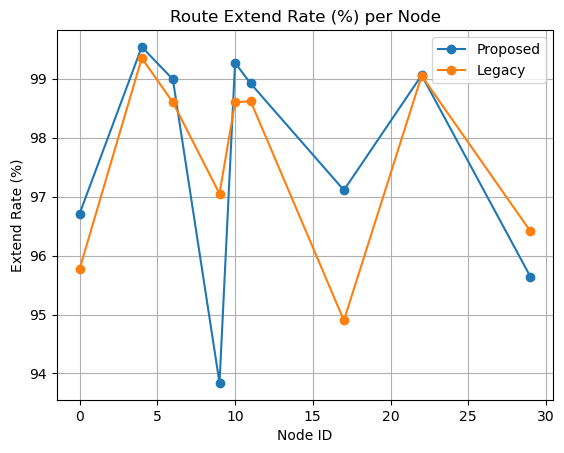

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]
base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S20/N'

def analyze_effective_lifetime(base_path, label):
    result = []
    for node in h_node:
        file_path = os.path.join(base_path + str(node), 'aodv_routing_log.csv')
        if not os.path.isfile(file_path):
            continue

        df = pd.read_csv(file_path)
        if not {'Time', 'Previous_LifeTime', 'New_LifeTime'}.issubset(df.columns):
            continue

        df = df.sort_values(by='Time')
        df['LifeTimeDelta'] = df['New_LifeTime'] - df['Previous_LifeTime']

        extend_count = (df['LifeTimeDelta'] > 0.1).sum()
        create_count = (df['Previous_LifeTime'] == 0).sum()
        total_events = len(df)

        result.append({
            'Node': node,
            'Label': label,
            'CreatedRoutes': create_count,
            'ExtendedRoutes': extend_count,
            'TotalEvents': total_events,
            'ExtendRate(%)': round((extend_count / total_events) * 100, 2) if total_events > 0 else 0.0
        })

    return pd.DataFrame(result)

df_proposed = analyze_effective_lifetime(base_path_proposed, 'Proposed')
df_legacy = analyze_effective_lifetime(base_path_legacy, 'Legacy')
df_all = pd.concat([df_proposed, df_legacy], ignore_index=True)

# 그래프
plt.figure()
for label in ['Proposed', 'Legacy']:
    subset = df_all[df_all['Label'] == label]
    plt.plot(subset['Node'], subset['ExtendRate(%)'], marker='o', label=label)

plt.title('Route Extend Rate (%) per Node')
plt.xlabel('Node ID')
plt.ylabel('Extend Rate (%)')
plt.grid(True)
plt.legend()
plt.show()


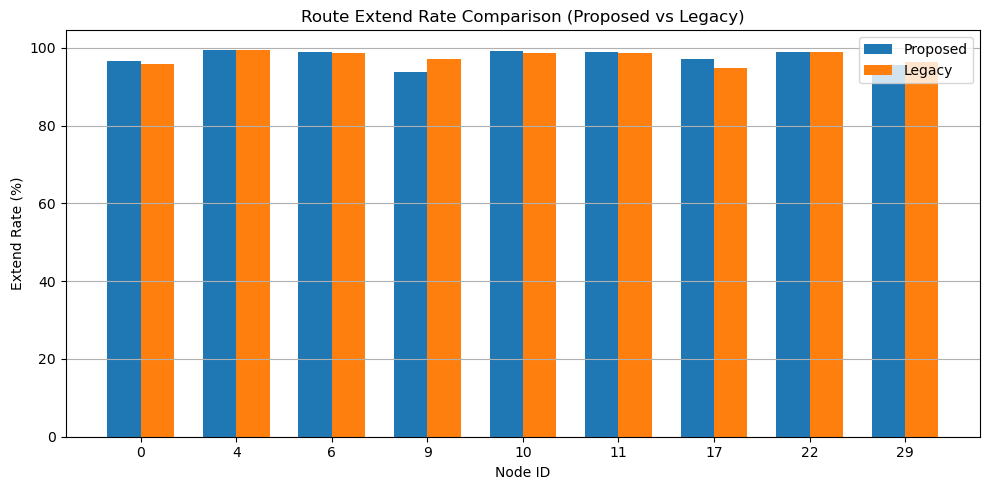

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 정렬된 노드 기준으로 재정렬
df_sorted = df_all.sort_values(by='Node')
nodes = sorted(df_sorted['Node'].unique())
x = np.arange(len(nodes))

proposed_rates = df_sorted[df_sorted['Label'] == 'Proposed'].set_index('Node').loc[nodes]['ExtendRate(%)']
legacy_rates = df_sorted[df_sorted['Label'] == 'Legacy'].set_index('Node').loc[nodes]['ExtendRate(%)']

bar_width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, proposed_rates, width=bar_width, label='Proposed')
plt.bar(x + bar_width/2, legacy_rates, width=bar_width, label='Legacy')

plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('Extend Rate (%)')
plt.title('Route Extend Rate Comparison (Proposed vs Legacy)')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [46]:
import os
import pandas as pd

nodes = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_prop = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
base_lega = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S20/N'

def recovery_success_rate(base_path):
    results = {}
    for node in nodes:
        path = os.path.join(base_path + str(node), 'recovery_log.csv')
        if not os.path.isfile(path):
            continue
        df = pd.read_csv(path, header=None)
        df.columns = ['time', 'node', 'dst', 'type']
        total = df[df['type'].str.contains('RREQ_SENT')].shape[0]
        success = df[df['type'] == 'RREP_RECV'].shape[0]
        rate = round((success / total) * 100, 2) if total > 0 else 0.0
        results[node] = rate
    return results

def lifetime_extension_rate(base_path):
    results = {}
    for node in nodes:
        path = os.path.join(base_path + str(node), 'aodv_routing_log.csv')
        if not os.path.isfile(path):
            continue
        df = pd.read_csv(path)
        if not {'Previous_LifeTime', 'New_LifeTime'}.issubset(df.columns):
            continue
        extended = (df['New_LifeTime'] > df['Previous_LifeTime']).sum()
        total = len(df)
        rate = round((extended / total) * 100, 2) if total > 0 else 0.0
        results[node] = rate
    return results

def delay_stddev(base_path):
    results = {}
    for node in nodes:
        path = os.path.join(base_path + str(node), 'success_app.txt')
        if not os.path.isfile(path):
            continue
        delays = []
        with open(path) as f:
            for line in f:
                parts = line.strip().split(',')
                if len(parts) >= 4:
                    try:
                        delay = float(parts[3])
                        delays.append(delay)
                    except:
                        continue
        if len(delays) >= 2:
            results[node] = round(pd.Series(delays).std(), 2)
    return results

def failure_around_disruption(base_path):
    results = {}
    for node in nodes:
        rec_path = os.path.join(base_path + str(node), 'recovery_log.csv')
        fail_path = os.path.join(base_path + str(node), 'failedCount.txt')
        if not os.path.isfile(rec_path) or not os.path.isfile(fail_path):
            continue

        rec_df = pd.read_csv(rec_path, header=None)
        rec_df.columns = ['time', 'node', 'dst', 'type']
        disruption_times = rec_df[rec_df['type'].str.contains('BREAK|RREQ_SENT')]['time'].astype(float).tolist()

        fail_times = []
        with open(fail_path) as f:
            for line in f:
                try:
                    t = float(line.strip())
                    fail_times.append(t)
                except:
                    continue

        window = 1.0
        count = 0
        for d_time in disruption_times:
            count += sum(1 for t in fail_times if d_time <= t <= d_time + window)

        avg_fail = round(count / len(disruption_times), 2) if disruption_times else 0.0
        results[node] = avg_fail
    return results

df = pd.DataFrame({'Node': nodes})
df['Recovery_Prop'] = df['Node'].map(recovery_success_rate(base_prop))
df['Recovery_Lega'] = df['Node'].map(recovery_success_rate(base_lega))

df['ExtendRate_Prop'] = df['Node'].map(lifetime_extension_rate(base_prop))
df['ExtendRate_Lega'] = df['Node'].map(lifetime_extension_rate(base_lega))

df['DelayStd_Prop'] = df['Node'].map(delay_stddev(base_prop))
df['DelayStd_Lega'] = df['Node'].map(delay_stddev(base_lega))

df['FailAfterBreak_Prop'] = df['Node'].map(failure_around_disruption(base_prop))
df['FailAfterBreak_Lega'] = df['Node'].map(failure_around_disruption(base_lega))

print(df)


   Node  Recovery_Prop  Recovery_Lega  ExtendRate_Prop  ExtendRate_Lega  \
0     0         564.61         574.74            98.84            99.16   
1     4         292.11         292.11            99.75            99.74   
2     6         503.19         715.15            99.61            99.71   
3     9         887.10         840.70            98.39            99.74   
4    10         543.75         715.15            99.62            99.71   
5    11         585.88         518.99            99.59            99.63   
6    17         772.29        1213.59            98.91            99.24   
7    22         485.71         670.13            99.70            99.71   
8    29         606.61        1137.08            98.46            99.31   

   DelayStd_Prop  DelayStd_Lega  FailAfterBreak_Prop  FailAfterBreak_Lega  
0            NaN            NaN                  0.0                  0.0  
1            NaN            NaN                  0.0                  0.0  
2            NaN     

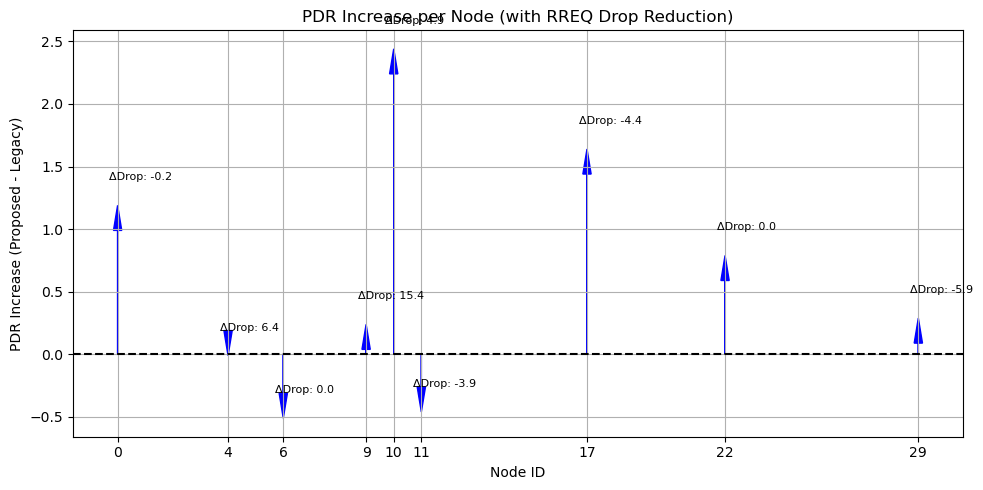

In [49]:
import matplotlib.pyplot as plt

nodes = [0, 4, 6, 9, 10, 11, 17, 22, 29]
pdr_diff = [4.23 - 3.04, 8.33 - 8.34, 5.21 - 5.72, 2.24 - 2.00, 8.16 - 5.72,
            7.58 - 8.04, 4.85 - 3.21, 6.36 - 5.57, 4.09 - 3.80]
rreq_drop_lega = [48.70, 48.92, 49.99, 76.87, 62.71, 57.51, 51.94, 56.38, 51.31]
rreq_drop_prop = [48.91, 42.53, 49.99, 61.43, 57.79, 61.38, 56.32, 56.38, 57.26]
drop_diff = [lega - prop for lega, prop in zip(rreq_drop_lega, rreq_drop_prop)]

plt.figure(figsize=(10, 5))
plt.axhline(0, color='black', linestyle='--')
for i, node in enumerate(nodes):
    plt.arrow(node, 0, 0, pdr_diff[i], head_width=0.3, head_length=0.2,
              length_includes_head=True, color='blue')
    plt.text(node - 0.3, pdr_diff[i] + 0.2, f'ΔDrop: {drop_diff[i]:.1f}', fontsize=8)

plt.xticks(nodes)
plt.xlabel('Node ID')
plt.ylabel('PDR Increase (Proposed - Legacy)')
plt.title('PDR Increase per Node (with RREQ Drop Reduction)')
plt.tight_layout()
plt.grid(True)
plt.show()


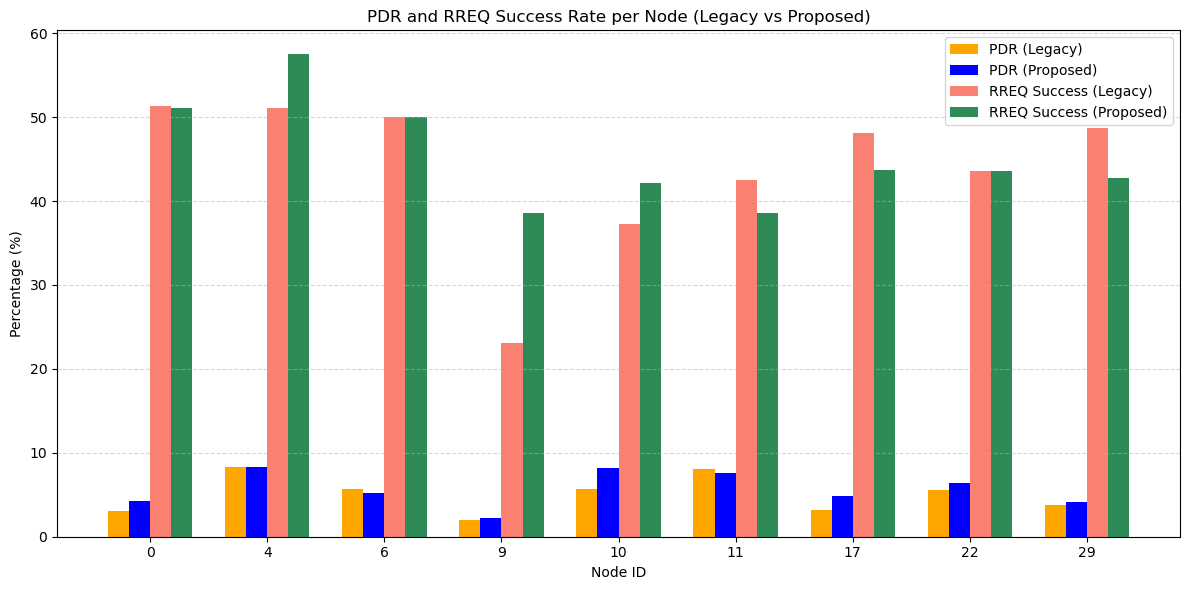

In [54]:
import matplotlib.pyplot as plt
import numpy as np

nodes = [0, 4, 6, 9, 10, 11, 17, 22, 29]

pdr_lega = [3.04, 8.34, 5.72, 2.00, 5.72, 8.04, 3.21, 5.57, 3.80]
pdr_prop = [4.23, 8.33, 5.21, 2.24, 8.16, 7.58, 4.85, 6.36, 4.09]

drop_lega = [48.70, 48.92, 49.99, 76.87, 62.71, 57.51, 51.94, 56.38, 51.31]
drop_prop = [48.91, 42.53, 49.99, 61.43, 57.79, 61.38, 56.32, 56.38, 57.26]

success_lega = [100 - d for d in drop_lega]
success_prop = [100 - d for d in drop_prop]

x = np.arange(len(nodes))
width = 0.18

plt.figure(figsize=(12, 6))
plt.bar(x - width*1.5, pdr_lega, width, label='PDR (Legacy)', color='orange')
plt.bar(x - width/2, pdr_prop, width, label='PDR (Proposed)', color='blue')
plt.bar(x + width/2, success_lega, width, label='RREQ Success (Legacy)', color='salmon')
plt.bar(x + width*1.5, success_prop, width, label='RREQ Success (Proposed)', color='seagreen')

plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('Percentage (%)')
plt.title('PDR and RREQ Success Rate per Node (Legacy vs Proposed)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [44]:
import os
import pandas as pd

node = 0
base_prop = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
path = os.path.join(base_prop + str(node), 'recovery_log.csv')

if os.path.isfile(path):
    df = pd.read_csv(path)
    print(df.columns)


Index(['30', 'rsu[0]', '10.0.0.84', 'RREQ_SENT'], dtype='object')


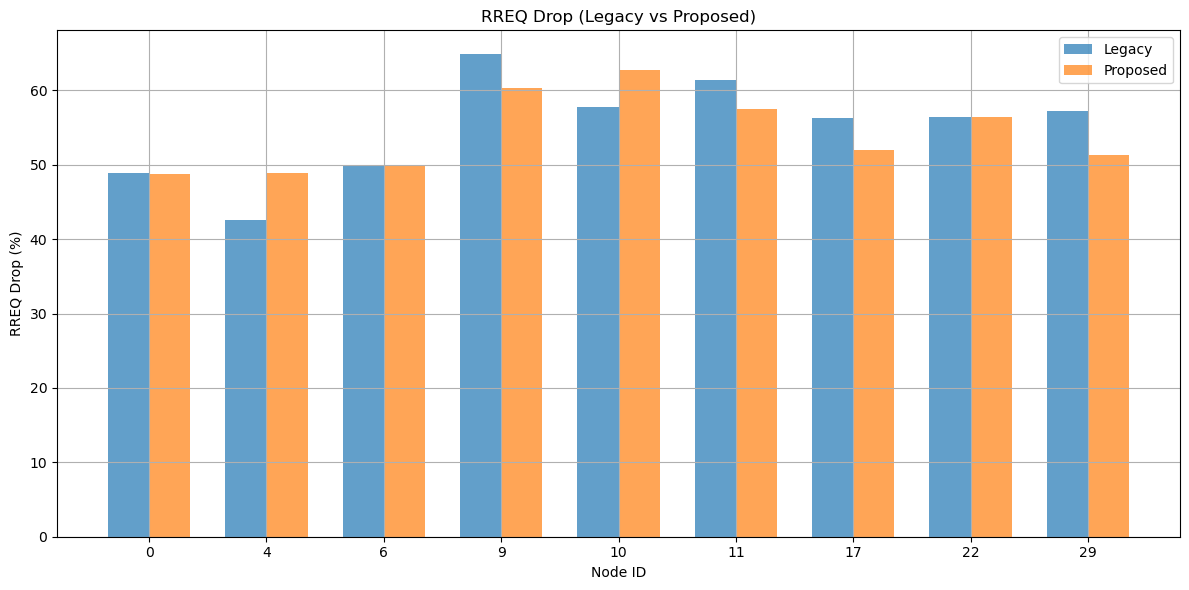

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S30/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        rreq_file = node_path + 'rreqCount.txt'
        drop_file = node_path + 'sinr_drop_log.csv'

        rreq_total = 0
        rreq_drop = 0

        if os.path.isfile(rreq_file):
            with open(rreq_file, 'r') as f:
                rreq_total = len(f.readlines())

        if os.path.isfile(drop_file):
            df = pd.read_csv(drop_file, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
                'None', 'Nearby', 'Total'
            ])
            df.columns = df.columns.str.strip()
            rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
m_path = '/P'
d_path = '/D400'
s_path = '/S30'
h_node = [0, 4, 6, 7, 9, 10, 11, 17, 22, 29]
m_node = [6, 7, 17, 18, 21, 22, 24, 26, 27, 29]
l_node = [6, 7, 17, 18, 19, 21, 22, 24, 25, 26]
base_path = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02' +m_path + d_path + s_path + '/N'

In [10]:
drop_map = {}

for node in h_node:
    if os.path.isfile(base_path + str(node) + '/sinr_drop_log.csv') :
        sinr_drop_df = pd.read_csv(base_path + str(node) + '/sinr_drop_log.csv')
        sinr_drop_df.columns = ['Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z', 'None', 'Nearby', 'Total']
        for time, packet in sinr_drop_df[['Time', 'Packet']].values :
            if 'Rreq' in packet and drop_map.get(node) is None :
                drop_map[node] = 1
            elif 'Rreq' in packet and drop_map.get(node) is not None :
                drop_map[node] += 1
    else :
        print(node, ': No files')

In [11]:
drop_map

{0: 29127,
 4: 24150,
 6: 22184,
 7: 40431,
 9: 177102,
 10: 35807,
 11: 56503,
 17: 59729,
 22: 28729,
 29: 39416}

In [8]:
drop_map

{0: 29763,
 4: 11920,
 6: 22184,
 7: 20076,
 9: 165172,
 10: 49567,
 11: 79875,
 17: 63992,
 22: 28729,
 26: 32630}

In [15]:
import os
import pandas as pd

m_path = '/P'
d_path = '/D400'
s_path = '/S30'
h_node = [0, 4, 6, 7, 9, 10, 11, 17, 22, 29]
base_path = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02' + m_path + d_path + s_path + '/N'

drop_ratio_map = {}

for node in h_node:
    file_path = base_path + str(node) + '/sinr_drop_log.csv'
    if os.path.isfile(file_path):
        sinr_drop_df = pd.read_csv(file_path)
        sinr_drop_df.columns = ['Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z', 'None', 'Nearby', 'Total']
        
        rreq_drop_count = sinr_drop_df['Packet'].str.contains('Rreq').sum()
        total_count = sinr_drop_df['Total'].sum()

        if total_count > 0:
            drop_ratio = (rreq_drop_count / total_count) * 100
        else:
            drop_ratio = 0.0

        drop_ratio_map[node] = drop_ratio
    else:
        print(node, ': No files')

print(drop_ratio_map)


{0: 3.297274289479106, 4: 4.175968210766217, 6: 4.983074528231956, 7: 13.971980703039685, 9: 5.807992113550703, 10: 7.434066698362542, 11: 6.7200995235524, 17: 4.232734117060125, 22: 5.591736476596805, 29: 6.554313032633548}


In [18]:
df = pd.read_csv('C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S30/N0/aodv_routing_log.csv')
print(df.columns.tolist())
print(df.head())


['Time', 'Node', 'Destination', 'Previous_LifeTime', 'New_LifeTime', 'Previous_NextHop', 'New_NextHop', 'Previous_HopCount', 'New_HopCount']
        Time       Node Destination  Previous_LifeTime  New_LifeTime  \
0  30.003715   node[35]    10.0.0.9          33.003715     35.523715   
1  30.003715  node[265]    10.0.0.9          33.003715     35.523715   
2  30.003715  node[243]    10.0.0.9          33.003715     35.523715   
3  30.003715  node[130]    10.0.0.9          33.003715     35.523715   
4  30.003715  node[102]    10.0.0.9          33.003715     35.523715   

  Previous_NextHop New_NextHop  Previous_HopCount  New_HopCount  
0         10.0.0.9    10.0.0.9                  1             1  
1         10.0.0.9    10.0.0.9                  1             1  
2         10.0.0.9    10.0.0.9                  1             1  
3         10.0.0.9    10.0.0.9                  1             1  
4         10.0.0.9    10.0.0.9                  1             1  


In [26]:
import os
import pandas as pd

# 노드 리스트
h_node = [0, 4, 6, 7, 9, 10, 11, 17, 22, 29]

base_path = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S30/N'

rreq_drop_ratio_per_node = {}
rrep_drop_ratio_per_node = {}

for node in h_node:
    node_path = base_path + str(node) + '/'
    
    # rreqCount.txt 전송 수
    rreq_file = node_path + 'rreqCount.txt'
    rrep_file = node_path + 'rrepCount.txt'
    
    rreq_total = 0
    rrep_total = 0
    
    if os.path.isfile(rreq_file):
        with open(rreq_file, 'r') as f:
            rreq_total = len(f.readlines())
    
    if os.path.isfile(rrep_file):
        with open(rrep_file, 'r') as f:
            rrep_total = len(f.readlines())

    # SINR 드롭 수
    drop_file = node_path + 'sinr_drop_log.csv'
    rreq_drop = 0
    rrep_drop = 0
    
    if os.path.isfile(drop_file):
        df = pd.read_csv(drop_file, names=[
            'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
            'None', 'Nearby', 'Total'
        ])
        df.columns = df.columns.str.strip()
        rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()
        rrep_drop = df['Packet'].str.contains('Rrep', case=False).sum()
    
    # 비율 계산
    rreq_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
    rrep_ratio = (rrep_drop / rrep_total) * 100 if rrep_total > 0 else 0.0

    rreq_drop_ratio_per_node[node] = rreq_ratio
    rrep_drop_ratio_per_node[node] = rrep_ratio

# 출력
print("RREQ Drop율 per Node (%)")
print(rreq_drop_ratio_per_node)

print("\nRREP Drop율 per Node (%)")
print(rrep_drop_ratio_per_node)


RREQ Drop율 per Node (%)
{0: 48.91372226787182, 4: 42.53095008740947, 6: 49.98873366381253, 7: 61.42760983967691, 9: 64.8441640527161, 10: 57.788399883415906, 11: 61.38499727181206, 17: 56.31501135223612, 22: 56.378657351988856, 29: 57.26344236978801}

RREP Drop율 per Node (%)
{0: 4229.482071713147, 4: 6298.0, 6: 5565.625, 7: 4000.0, 9: 3050.719822812846, 10: 4378.47533632287, 11: 3406.9252077562323, 17: 3254.277286135693, 22: 7717.977528089888, 29: 5021.854304635762}


In [25]:
import os
import pandas as pd

# 노드 리스트
h_node = [0, 4, 6, 7, 9, 10, 11, 17, 22, 29]

base_path = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N'

rreq_drop_ratio_per_node = {}
rrep_drop_ratio_per_node = {}

for node in h_node:
    node_path = base_path + str(node) + '/'
    
    # rreqCount.txt 전송 수
    rreq_file = node_path + 'rreqCount.txt'
    rrep_file = node_path + 'rrepCount.txt'
    
    rreq_total = 0
    rrep_total = 0
    
    if os.path.isfile(rreq_file):
        with open(rreq_file, 'r') as f:
            rreq_total = len(f.readlines())
    
    if os.path.isfile(rrep_file):
        with open(rrep_file, 'r') as f:
            rrep_total = len(f.readlines())

    # SINR 드롭 수
    drop_file = node_path + 'sinr_drop_log.csv'
    rreq_drop = 0
    rrep_drop = 0
    
    if os.path.isfile(drop_file):
        df = pd.read_csv(drop_file, names=[
            'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
            'None', 'Nearby', 'Total'
        ])
        df.columns = df.columns.str.strip()
        rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()
        rrep_drop = df['Packet'].str.contains('Rrep', case=False).sum()
    
    # 비율 계산
    rreq_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
    rrep_ratio = (rrep_drop / rrep_total) * 100 if rrep_total > 0 else 0.0

    rreq_drop_ratio_per_node[node] = rreq_ratio
    rrep_drop_ratio_per_node[node] = rrep_ratio

# 출력
print("RREQ Drop율 per Node (%)")
print(rreq_drop_ratio_per_node)

print("\nRREP Drop율 per Node (%)")
print(rrep_drop_ratio_per_node)


RREQ Drop율 per Node (%)
{0: 48.704957779449884, 4: 48.922335210468745, 6: 49.98873366381253, 7: 76.86984295980835, 9: 60.38638448188268, 10: 62.708836818325096, 11: 57.50750597933947, 17: 51.941840443849244, 22: 56.378657351988856, 29: 51.31085654777402}

RREP Drop율 per Node (%)
{0: 4356.50406504065, 4: 7071.232876712328, 6: 5542.708333333334, 7: 23390.47619047619, 9: 2559.154929577465, 10: 5151.87969924812, 11: 3908.2125603864733, 17: 3193.5, 22: 7985.393258426966, 29: 4865.562913907285}


In [55]:
import os
import pandas as pd

nodes = [0, 4, 6, 7, 9, 10, 11, 17, 22, 29]

base_path_prop = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N'
base_path_lega = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S30/N'

def get_sinr_rreq_drop_ratio(base_path):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path + str(node), 'sinr_drop_log.csv')
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path, header=None)
            df.columns = ['Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z', 'None', 'Nearby', 'Total']
            total_count = len(df)
            rreq_count = df['Packet'].str.contains('Rreq', case=False).sum()
            avg_nearby = df['Nearby'].mean()
            ratio = (rreq_count / total_count) * 100 if total_count > 0 else 0.0
            result[node] = {
                'rreq_drop_ratio': ratio,
                'avg_nearby': avg_nearby
            }
    return result

prop_data = get_sinr_rreq_drop_ratio(base_path_prop)
lega_data = get_sinr_rreq_drop_ratio(base_path_lega)

rows = []
for node in nodes:
    if node in prop_data and node in lega_data:
        rows.append({
            'Node': node,
            'Drop_Prop': round(prop_data[node]['rreq_drop_ratio'], 2),
            'Drop_Lega': round(lega_data[node]['rreq_drop_ratio'], 2),
            'Nearby_Prop': round(prop_data[node]['avg_nearby'], 2),
            'Nearby_Lega': round(lega_data[node]['avg_nearby'], 2),
            'Drop_Diff': round(lega_data[node]['rreq_drop_ratio'] - prop_data[node]['rreq_drop_ratio'], 2)
        })

df = pd.DataFrame(rows)
print(df)


   Node  Drop_Prop  Drop_Lega  Nearby_Prop  Nearby_Lega  Drop_Diff
0     0      47.27      47.49         0.32         0.32       0.22
1     4      59.09      46.26         0.31         0.29     -12.83
2     6      61.47      61.43         0.21         0.21      -0.04
3     7      84.25      59.76         0.08         0.08     -24.49
4     9      59.66      58.77         0.21         0.20      -0.89
5    10      63.03      61.65         0.17         0.18      -1.39
6    11      63.70      61.70         0.16         0.12      -1.99
7    17      55.91      62.46         0.20         0.12       6.55
8    22      56.66      56.95         0.19         0.19       0.29
9    29      59.40      57.77         0.14         0.15      -1.63


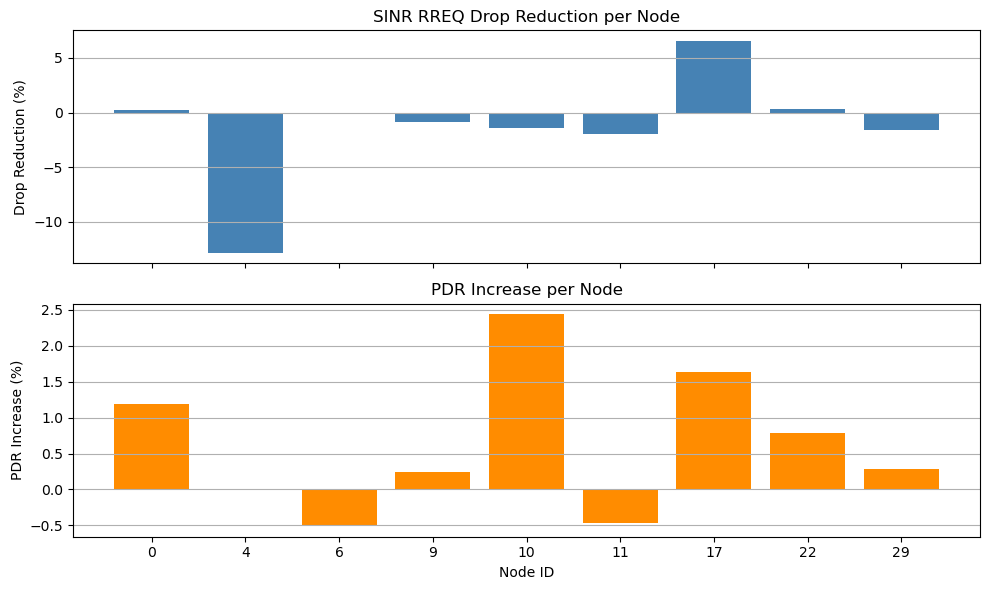

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

nodes = [0, 4, 6, 9, 10, 11, 17, 22, 29]
drop_diff = [0.22, -12.83, -0.04, -0.89, -1.39, -1.99, 6.55, 0.29, -1.63]
pdr_diff = [4.23 - 3.04, 8.33 - 8.34, 5.21 - 5.72, 2.24 - 2.00, 8.16 - 5.72,
            7.58 - 8.04, 4.85 - 3.21, 6.36 - 5.57, 4.09 - 3.80]

x = np.arange(len(nodes))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1.bar(x, drop_diff, color='steelblue')
ax1.set_ylabel('Drop Reduction (%)')
ax1.set_title('SINR RREQ Drop Reduction per Node')
ax1.grid(True, axis='y')

ax2.bar(x, pdr_diff, color='darkorange')
ax2.set_xticks(x)
ax2.set_xticklabels(nodes)
ax2.set_xlabel('Node ID')
ax2.set_ylabel('PDR Increase (%)')
ax2.set_title('PDR Increase per Node')
ax2.grid(True, axis='y')

plt.tight_layout()
plt.show()
